In [1]:
import matplotlib.pyplot as plt
import os
import os.path
import math
import numpy as np

In [2]:
def create_file_name(path, name, suffix):
    return os.path.join(path, name + suffix)

In [3]:
def read_lidar_times(frame_id):
    file_path = create_file_name("../debug_output/", str(frame_id), "_seg.txt")
    if not os.path.exists(file_path):
        print("File path: {} does not exists.".format(file_path))
        return {}
    times = {}
    with open(file_path) as lidar_times_file:
        lines = lidar_times_file.readlines()
        for line in lines:
            components = line.strip().split()
            times[components[0]] = float(components[1])
    return times

In [4]:
def plot_lidar_times(times_list):
    average_times = {}
    std_dev_times = {}
    keys = times_list[0].keys()
    for key in keys:
        values = np.array([times[key] for times in times_list])
        average_times[key] = np.round(np.average(values), decimals=3)
        std_dev_times[key] = np.round(np.sqrt(np.var(values)), decimals=3)
        print("{} - {} - {}".format(key, average_times[key], std_dev_times[key]))
    average_response_time = np.round(np.sum([average_times[key] for key in keys]), decimals=3)
    legend_names = []
    legend_bars = []
    figure, axes = plt.subplots(figsize=(20,10))
    reversed_keys = list(keys)
    bottoms = np.zeros(len(times_list))
    zero = 0
    for key in reversed_keys:
        if average_times[key] > 1:
            legend_names.append(key)
            values = [times[key] for times in times_list]
            legend_bars.append(axes.bar(np.arange(len(values)), values, width=0.5, bottom=bottoms))
            bottoms = values
    for key in legend_names:
        axes.plot([0, len(times_list) - 1], [average_times[key] + zero, average_times[key] + zero], color='black')
        zero += average_times[key]
    axes.set_ylabel("Step Times [ms]")
    axes.set_xticks(np.arange(len(times_list), int(math.sqrt(len(times_list)))))
    axes.set_title("Lidar Segmentation {} ms".format(average_response_time))
    axes.legend(legend_bars, legend_names)
    plt.savefig("lidar.svg")

In [5]:
def read_recognition_respose_times():
    file_path = create_file_name(".", "lidar.log", "")
    if not os.path.exists(file_path):
        print("File path: {} does not exists.".format(file_path))
        return {}
    response_times = []
    with open(file_path) as lidar_log_file:
        lines = lidar_log_file.readlines()
        response_times_lines = [line for line in lines if "Response time" in line]
        response_times = [float(line.strip().split()[-1]) for line in response_times_lines]
        return response_times

In [6]:
def plot_recognition_response_times(response_times):
    average_recognition_response_time = np.round(np.average(np.array(response_times)), decimals=2)
    std_dev_response_time = np.round(np.sqrt(np.var(np.array(response_times))), decimals=2)
    print("{} - {} - {}".format("Recognition", average_recognition_response_time, std_dev_response_time))
    figure, axes = plt.subplots(figsize=(20,10))
    axes.bar(np.arange(len(response_times)), response_times, width=0.5)
    axes.plot([0, len(response_times) - 1], [average_recognition_response_time, average_recognition_response_time], color="black")
    axes.set_ylabel("Response Times [ms]")
    axes.set_title("Recognition {} ms".format(average_recognition_response_time))
    plt.savefig("recognition.svg")

In [7]:
def main():
    if not os.path.exists("../debug_output"):
        print("The debug_output folder must exist!")
        return
    lidar_times_count = len(os.listdir("../debug_output"))
    times_list = []
    for i in range(1, lidar_times_count + 1):
        times = read_lidar_times(i)
        times_list.append(times)
    recognition_response_times = read_recognition_respose_times()
    plot_lidar_times(times_list)
    plot_recognition_response_times(recognition_response_times)

Segmentor::Segment: - 22.788 - 2.743
ObjectFilter::Filter: - 0.013 - 0.004
ObjectBuilder::Build: - 0.652 - 1.588
CloudPreprocessor::Preprocess: - 8.821 - 5.324
MapManager::Update: - 0.0 - 0.0
Recognition - 1.68 - 1.04


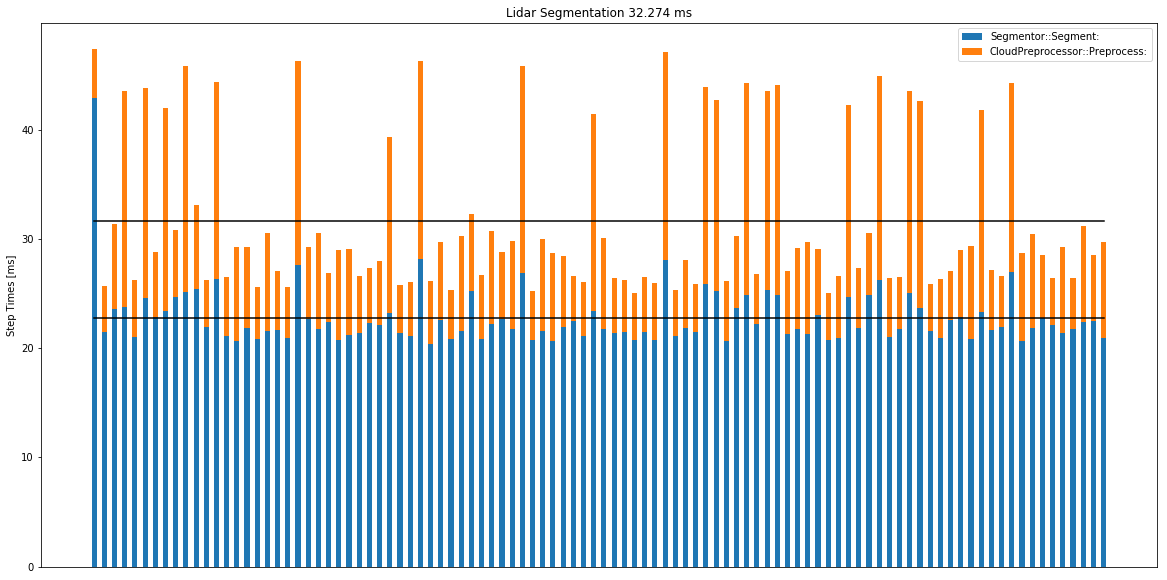

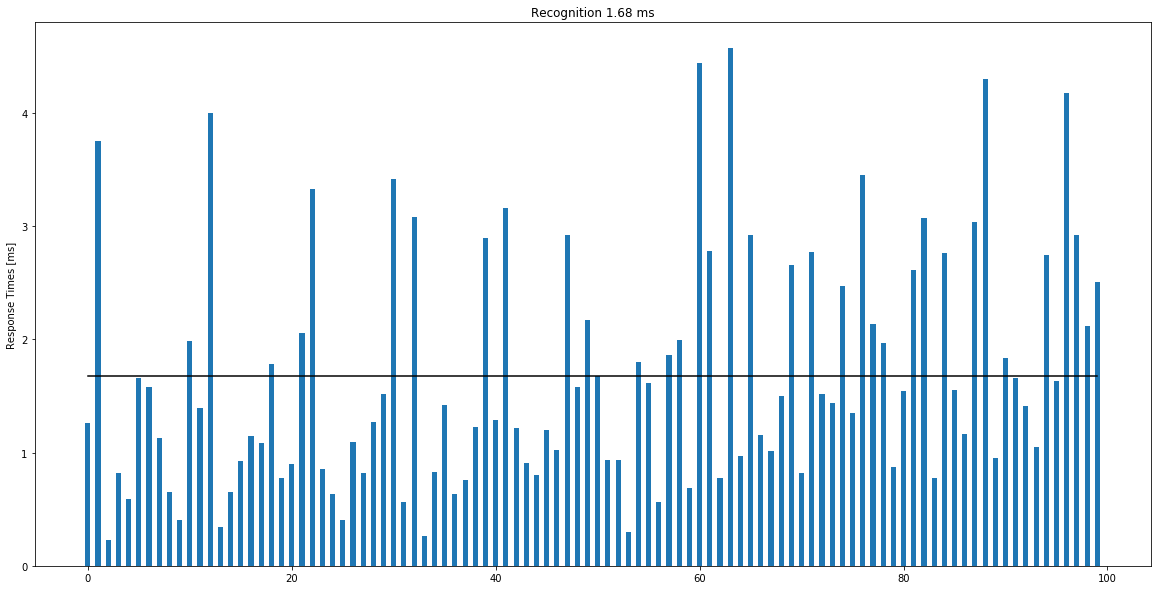

In [8]:
main()